In [1]:
import numpy as np 
import torch 

In [2]:
import torchvision
from torchvision import models, transforms 

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import json

In [21]:
!pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [4]:
print("Pytorch version", torch.__version__)
print("Torchvision version", torchvision.__version__)

Pytorch version 1.10.2+cpu
Torchvision version 0.11.3+cpu


In [5]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\ADMIN/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
class BaseTransform():
  def __init__(self, resize, mean, std):
    self.base_transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(resize),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
  def __call__(self, img):
    return self.base_transform(img)

In [12]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 6C25-BD48

 Directory of C:\Users\ADMIN\Pytorch

04/09/2023  10:41 PM    <DIR>          .
04/09/2023  10:28 PM    <DIR>          ..
04/09/2023  12:54 PM    <DIR>          .ipynb_checkpoints
04/09/2023  10:34 PM           465,151 cute_dog.jpg
04/09/2023  10:35 PM    <DIR>          data
04/09/2023  10:41 PM             7,881 Image Classification-Load Model.ipynb
04/08/2023  11:28 PM             3,574 pytorch_4(Xay dung module bang nn.Sequential).ipynb
               3 File(s)        476,606 bytes
               4 Dir(s)  18,695,004,160 bytes free


In [17]:
!move cute_dog.jpg data

        1 file(s) moved.


In [18]:
!dir data

 Volume in drive C is OS
 Volume Serial Number is 6C25-BD48

 Directory of C:\Users\ADMIN\Pytorch\data

04/09/2023  10:43 PM    <DIR>          .
04/09/2023  10:43 PM    <DIR>          ..
04/09/2023  10:34 PM           465,151 cute_dog.jpg
               1 File(s)        465,151 bytes
               2 Dir(s)  18,698,215,424 bytes free


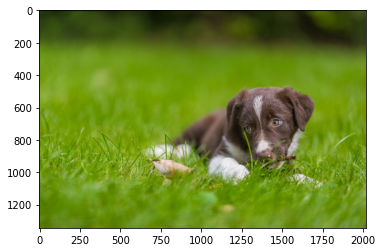

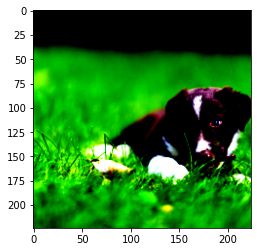

In [24]:
image_file_path = "./data/cute_dog.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize=224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform =  BaseTransform(resize, mean, std) # Tao ra transform
img_transformed = transform(img) #transform anh input

#(channels, height, width) -> (height,width,channels)
#clip(0,1)

img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()

In [33]:
class Predictor():
    def __init__(self, index_class):
        self.class_index = class_index
    
    def predict_max(self,out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]
        
        return predicted_label_name
    

In [34]:
class_index = json.load(open('./imagenet_class_index.json','r'))

In [35]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 6C25-BD48

 Directory of C:\Users\ADMIN\Pytorch

04/09/2023  11:09 PM    <DIR>          .
04/09/2023  11:07 PM    <DIR>          ..
04/09/2023  12:54 PM    <DIR>          .ipynb_checkpoints
04/09/2023  10:43 PM    <DIR>          data
04/09/2023  11:09 PM           245,921 Image Classification-Load Model.ipynb
04/09/2023  11:05 PM            35,363 imagenet_class_index.json
04/08/2023  11:28 PM             3,574 pytorch_4(Xay dung module bang nn.Sequential).ipynb
               3 File(s)        284,858 bytes
               4 Dir(s)  18,662,105,088 bytes free


In [36]:
predictor = Predictor(class_index)

In [39]:
img_file_path = './data/cute_dog.jpg'
img = Image.open(image_file_path)

resize=224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform =  BaseTransform(resize, mean, std) # Tao ra transform
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)
# img_transformed.shape
out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is:", result)

Result is: ['n02106166', 'Border_collie']
